In [1]:
from libpyhat.io.io_crism import Crism
from libpyhat.io.hcube import HCube
from libpyhat.derived.crism import crism_algs
import libpyhat as phat
from libpyhat.examples import get_path
from libpyhat.analytics.analytics import *
from libpyhat.derived.utils import *

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [23]:
# Show available CRISM functions
available = [i for i in dir(crism_algs) if not i.startswith('__')]
print(available)

['bd1300', 'bd1400', 'bd1435', 'bd1500', 'bd1750', 'bd1900', 'bd1900_2', 'bd1900r', 'bd1900r2', 'bd2100', 'bd2165', 'bd2190', 'bd2210', 'bd2230', 'bd2250', 'bd2265', 'bd2290', 'bd2355', 'bd2500h', 'bd2600', 'bd3000', 'bd3100', 'bd3200', 'bd3400', 'bd530', 'bd640', 'bd860', 'bd920', 'bdcarb', 'bdi1000IR', 'bdi1000VIS', 'bdi2000', 'cf', 'cindex', 'cindex2', 'd2200', 'd2300', 'doub2200h', 'generic_func', 'hcp_index', 'hcp_index2', 'icer1', 'icer1_2', 'icer2', 'irr1', 'irr2', 'irr3', 'islope1', 'lcp_index', 'lcp_index2', 'min2200', 'min2250', 'min2295_2480', 'min2345_2537', 'np', 'olivine_index2', 'olivine_index3', 'r1080', 'r1300', 'r1330', 'r1506', 'r2529', 'r3920', 'r440', 'r530', 'r600', 'r770', 'rbr', 'rpeak1', 'sh600', 'sh770', 'sindex', 'sindex2']


In [21]:
# Setting up variables
file = "/home/tgiroux/Desktop/crism_img/frt000047a3_07_if166j_mtr3.img"
data = Crism(file)
color_mapping = "Greys_r"

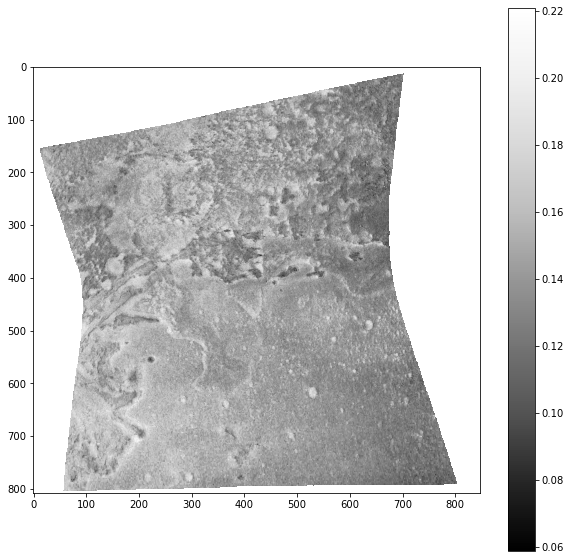

CPU times: user 43.2 s, sys: 929 ms, total: 44.1 s
Wall time: 6.29 s


In [10]:
%%time
result = crism_algs.bdi1000VIS(data) # BDI1000VIS result

figure(1, figsize=(10, 10))
imshow(result, cmap=color_mapping)
colorbar()
show()

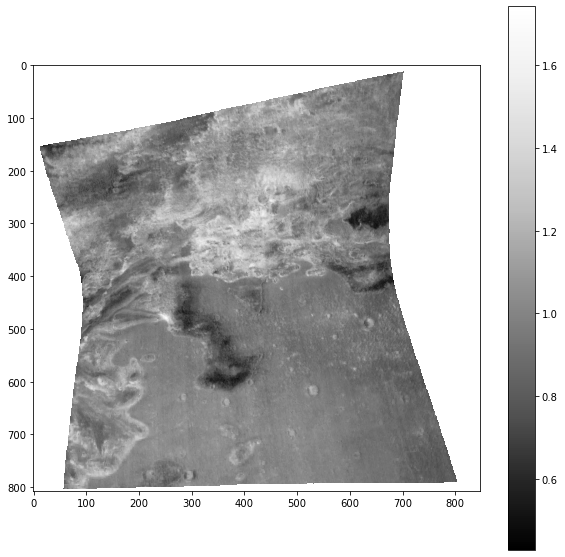

CPU times: user 1.06 s, sys: 4.79 ms, total: 1.07 s
Wall time: 1.08 s


In [11]:
%%time
result = crism_algs.bdi1000IR(data) # BDI1000IR result

figure(1, figsize=(10, 10))
imshow(result, cmap=color_mapping)
colorbar()
show()

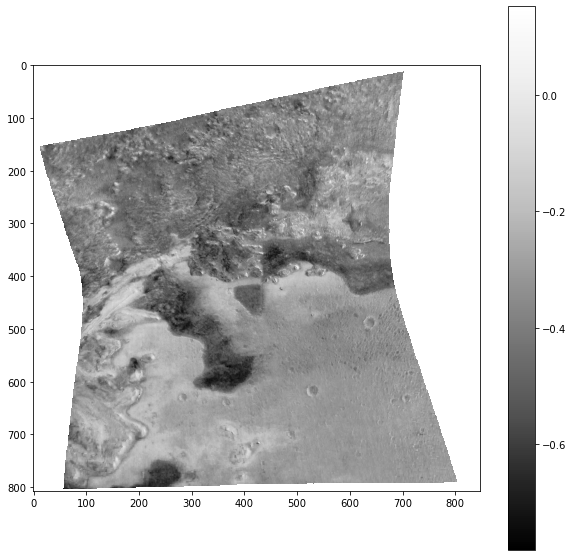

CPU times: user 13.8 s, sys: 243 ms, total: 14.1 s
Wall time: 2.67 s


In [12]:
%%time
result = crism_algs.bdi2000(data) # BDI2000 result

figure(1, figsize=(10, 10))
imshow(result, cmap=color_mapping)
colorbar()
show()

In [15]:
# defines a function used in next cell
def band_scale(band,n_std):
    bmean = np.nanmean(band)
    bstd = np.nanstd(band)
    bmin = bmean - bstd * n_std
    bmax = bmean + bstd * n_std
    # normalize each band to span the range 0 to 1
    band[band < bmin] = bmin
    band[band > bmax] = bmax
    band = (band - bmin) / (bmax - bmin)
    return band

<ipython-input-15-f9e13b28ba2b>:8: RuntimeWarning: invalid value encountered in less
  band[band < bmin] = bmin
<ipython-input-15-f9e13b28ba2b>:9: RuntimeWarning: invalid value encountered in greater
  band[band > bmax] = bmax
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


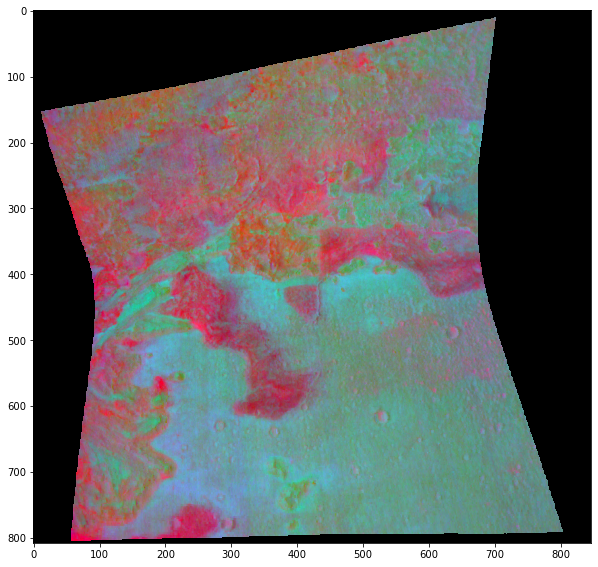

In [22]:
stretch_rgb = {'r':4, 'g':4, 'b':4} # change these values to stretch

# Browse Product MAF (r:OLINDEX3, g:LCPINDEX2, b:HCPINDEX2)
r = crism_algs.olivine_index3(data)
g = crism_algs.lcp_index2(data)
b = crism_algs.hcp_index2(data)

r = band_scale(r, stretch_rgb['r'])
g = band_scale(g, stretch_rgb['g'])
b = band_scale(b, stretch_rgb['b'])

color_image = np.vstack(([r.T],[g.T],[b.T])).T

figure(1, figsize=(10, 10))
imshow(color_image)
show()